In [28]:
import numpy as np
import matplotlib.pyplot as plt

As we explore differential equations, we will at times pause our study of equations involving continuous functions and look at how these problems can be approximated and discretized.  Moving from continuous to discrete, differential equations become systems of equations and integrating to find solutions becomes a question of solving matrix equations.

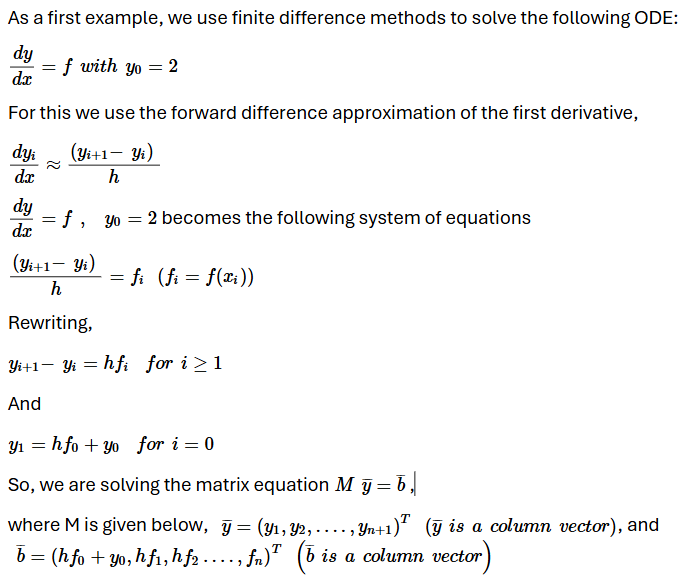

In [29]:
n=10
h=1/(n+1)
indx=np.linspace(0,n+1,n+2)
xvals=indx/(n+1)
y0=2

In [30]:
indx

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In this example, our xvals go from 0 to 1.

In [31]:
xvals

array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
       0.90909091, 1.        ])

In [32]:
h

0.09090909090909091

In this example, we have chosen f(x)=2x+1.  Try other functions.

In [33]:
fn=2*(xvals)+1

In [34]:
fn

array([1.        , 1.18181818, 1.36363636, 1.54545455, 1.72727273,
       1.90909091, 2.09090909, 2.27272727, 2.45454545, 2.63636364,
       2.81818182, 3.        ])

In [35]:
M=np.identity(n+1)

In [36]:
for i in range(n):
    M[i+1][i]=-1

In [37]:
M

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.]])

We don't need the (n+1) term in fn and we need b to be the proper length
for the matrix multiplication. fn[0:n+1] means we only terms up to and including
the nth term.

In [38]:
b=h*fn[0:n+1]

Don't forget to add our known value y0 to the first term.

In [39]:
b[0]=b[0]+y0

In [40]:
b

array([2.09090909, 0.10743802, 0.12396694, 0.14049587, 0.15702479,
       0.17355372, 0.19008264, 0.20661157, 0.2231405 , 0.23966942,
       0.25619835])

In [41]:
y=np.linalg.solve(M,b)

In [42]:
y

array([2.09090909, 2.19834711, 2.32231405, 2.46280992, 2.61983471,
       2.79338843, 2.98347107, 3.19008264, 3.41322314, 3.65289256,
       3.90909091])

We would like to plot y but we need to put in y0 first.  Now ybig and xvals have 
the same length and can be plotted.

In [43]:
ybig=np.insert(y,0,y0)

In [44]:
ybig

array([2.        , 2.09090909, 2.19834711, 2.32231405, 2.46280992,
       2.61983471, 2.79338843, 2.98347107, 3.19008264, 3.41322314,
       3.65289256, 3.90909091])

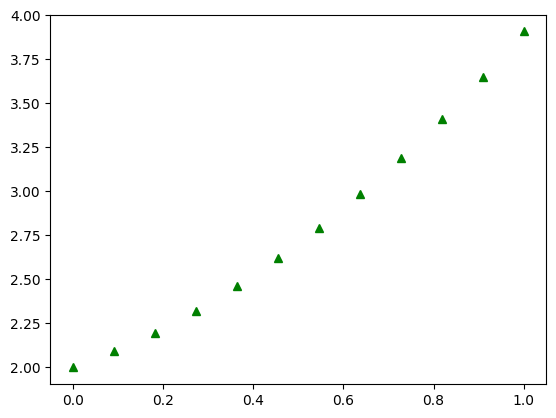

In [45]:
plt.plot(xvals,ybig,'g^')

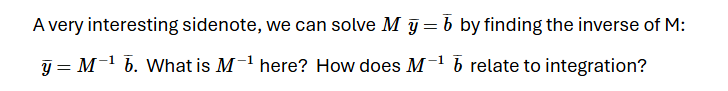

In [46]:
MInv=np.linalg.inv(M)

In [47]:
MInv

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])